Askelten määrä on  401.5


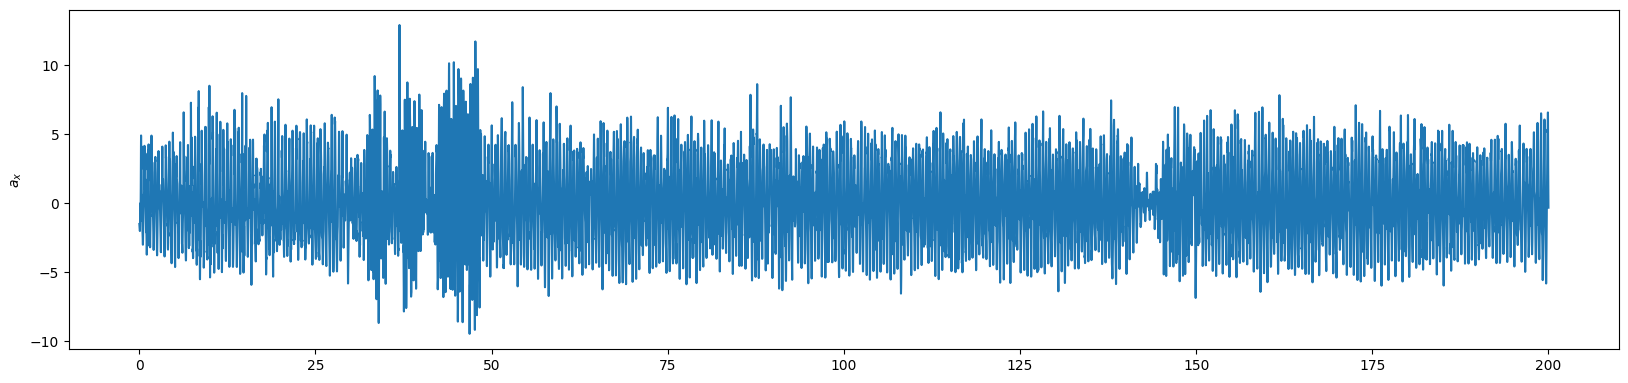

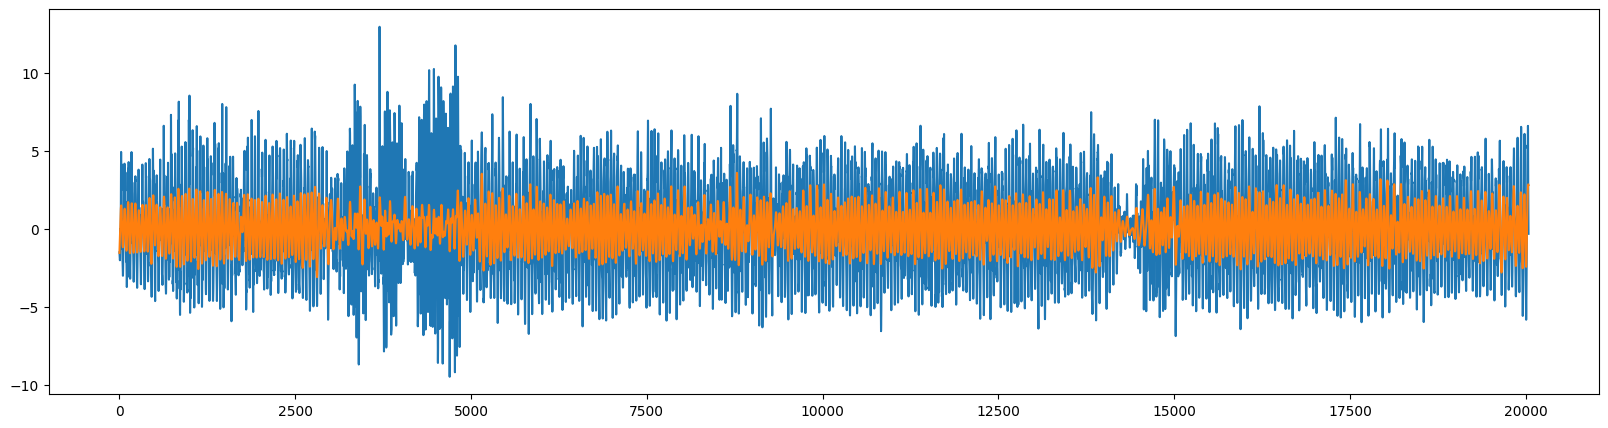

In [ ]:
#Step count from Linear Acceleration data by lowpass filtering
#I chose the Z axis data, it gave the most accurate depiction of my walking, considering the parts with running and slowing down
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import butter,filtfilt

df = pd.read_csv('Linear Accelerometer.csv')

plt.figure(figsize=(20,15))
plt.subplot(3,1,1)
plt.plot(df['Time (s)'], df['Z (m/s^2)'])
plt.ylabel('$a_x$')


def butter_lowpass_filter(data, cutoff, fs, nyq, order):
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

def butter_highpass_filter(data, cutoff, fs, nyq, order):
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    y = filtfilt(b, a, data)
    return y

#Final filtering and display
data = df['Z (m/s^2)']
T = df['Time (s)'].max() #this takes the length of data (from time)
n = len(df['Time (s)']) #This gives the data points
fs = n/T
nyq = fs/2
order = 3
cutoff = 1/0.5
filt_signal = butter_lowpass_filter(data, cutoff, fs, nyq, order)

#Here the original and filtered data gets displayed
plt.figure(figsize = (20,5))
plt.plot(data)
plt.plot(filt_signal)

#This counts the steps with counting the times the signal crosses zero
jaksot = 0
for i in range(n-1):
    if filt_signal[i]/filt_signal[i+1] < 0:
        jaksot = jaksot + 1

print('Steps from filtered data ', jaksot/2) #Steps 401-402, also shown below

Dominant step frequency: 2.05 Hz
Estimated step count: 411 steps


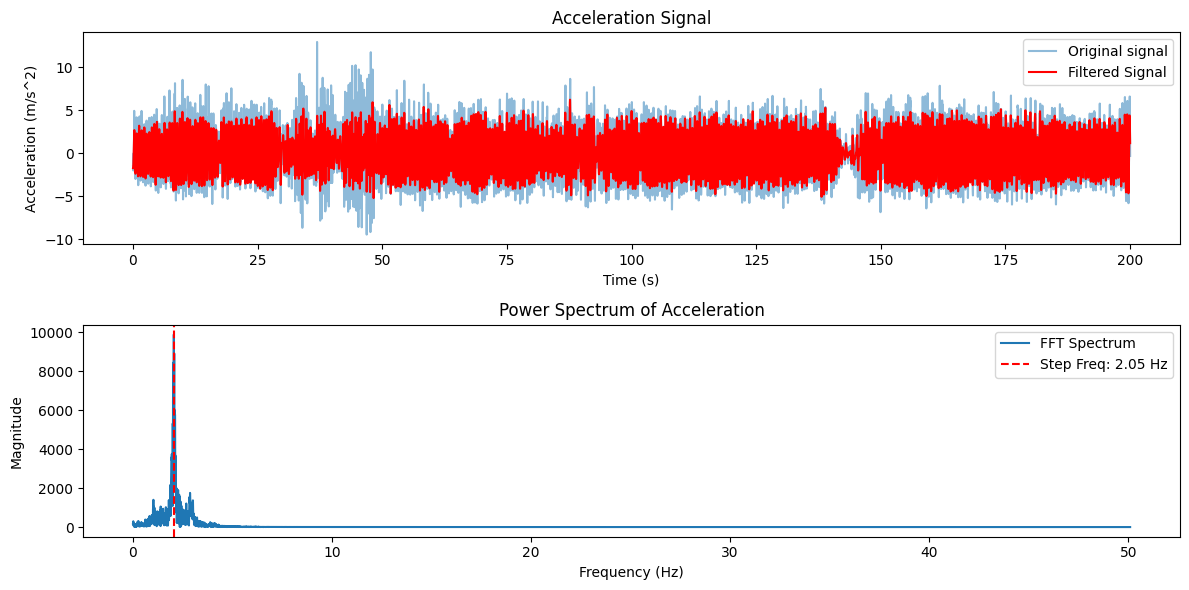

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

df = pd.read_csv("Linear Accelerometer.csv")

time = df["Time (s)"]
data = df["Z (m/s^2)"]

#Information sampling
T = time.max()  #The duration
n = len(time)   #Sample number
fs = n / T      #Frequency of samples
nyq = fs / 2    #Nyquist frequency

#Low-pass filter to remove noise
def butter_lowpass_filter(data, cutoff, fs, order=3):
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype="low", analog=False)
    return filtfilt(b, a, data)

cutoff = 3  #Removes unwanted high frequencies
filt_signal = butter_lowpass_filter(data, cutoff, fs)

#Computes the FFT
N = len(filt_signal)
fft_values = np.fft.fft(filt_signal)
freqs = np.fft.fftfreq(N, d=(1/fs))

#Keeps only the positive frequencies
mask = freqs > 0
freqs = freqs[mask]
fft_values = np.abs(fft_values[mask])

#Finds the dominant frequency
dominant_freq = freqs[np.argmax(fft_values)]
print(f"Dominant step frequency: {dominant_freq:.2f} Hz")

#estimates steps
estimated_steps = dominant_freq * T
print(f"Estimated step count: {int(estimated_steps)} steps")

plt.figure(figsize=(12,6))

#signals
plt.subplot(2, 1, 1)
plt.plot(time, data, label="Original signal", alpha=0.5)
plt.plot(time, filt_signal, label="Filtered Signal", color="red")
plt.xlabel("Time (s)")
plt.ylabel("Acceleration (m/s^2)")
plt.title("Acceleration Signal")
plt.legend()

#Power spectrum
plt.subplot(2, 1, 2)
plt.plot(freqs, fft_values, label="FFT Spectrum")
plt.axvline(dominant_freq, color="red", linestyle="--", label=f"Step Freq: {dominant_freq:.2f} Hz")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("Power Spectrum of Acceleration")
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import folium
from geopy.distance import geodesic

data = pd.read_csv('Location.csv')

#this filters out the non accurate data before phone being located
data = data.iloc[6:].reset_index(drop=True)

data["Time (s)"] = pd.to_numeric(data["Time (s)"], errors='coerce')

#computes the difference in time
data["Time Difference (s)"] = data["Time (s)"].diff()

#uses Haversine formula to get distances between consecutive points
distances = []
for i in range(1, len(data)):
    coord1 = (data.loc[i -1, "Latitude (°)"], data.loc[i - 1, "Longitude (°)"])
    coord2 = (data.loc[i, "Latitude (°)"], data.loc[i, "Longitude (°)"])
    dist = geodesic(coord1, coord2).meters
    distances.append(dist)

data["Distance (m)"] = [0] + distances

#Counts the distance walked
total_distance = data["Distance (m)"].sum()
total_time = data["Time Difference (s)"].sum()

#Counts the average speed
average_speed = total_distance / total_time if total_time > 0 else 0

average_speed_kmh = average_speed * 3.6

#This does the calculating and displaying of the step length
if estimated_steps > 0:
    step_length = total_distance / estimated_steps
else:
    print("No steps detected, cannot calculate step length.")

#This displays the map and the path taken
geography = folium.Map(location = [data["Latitude (°)"].median(), data["Longitude (°)"].median()],zoom_start = 17)
coordinates = [tuple(x)for x in data[['Latitude (°)','Longitude (°)']].to_numpy()]

folium.PolyLine(coordinates, weight=6).add_to(geography)
display(geography)

Total distance walked: 326.16 meters
Average speed: 1.71 m/s (6.17 km/h)
Average Step Length: 0.79 meters


In [ ]:
print(f"Dominant step frequency: {dominant_freq:.2f} Hz")
print(f"Estimated step count: {int(estimated_steps)} steps")

print(f"Total distance walked: {total_distance:.2f} meters")
#print(f"Total duration: {total_time:.2f} seconds")
print(f"Average speed: {average_speed:.2f} m/s ({average_speed_kmh:.2f} km/h)")
print(f"Average Step Length: {step_length:.2f} meters")